In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)});

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Bank%20Marketing/bank-additional-full.csv", delimiter=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df[(df['marital'] == 'single') | (df['marital'] =='divorced')]['age'].mean()

36.5053152039555

In [8]:
df[df["y"] == "no"]["day_of_week"].value_counts().idxmax()

'mon'

marital   y  
divorced  no      4136
          yes      476
married   no     22396
          yes     2532
single    no      9948
          yes     1620
unknown   no        68
          yes       12
Name: y, dtype: int64


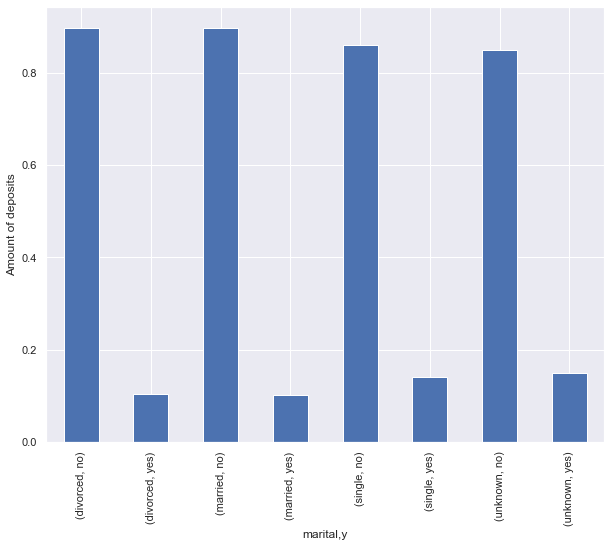

In [9]:
print(df.groupby('marital')['y'].value_counts())
df.groupby('marital')['y'].value_counts(normalize=True).plot(kind='bar') 
plt.ylabel('Amount of deposits')
plt.show();

Pearson correlation: -0.09935179776148564 p-value: 7.571244248214845e-91


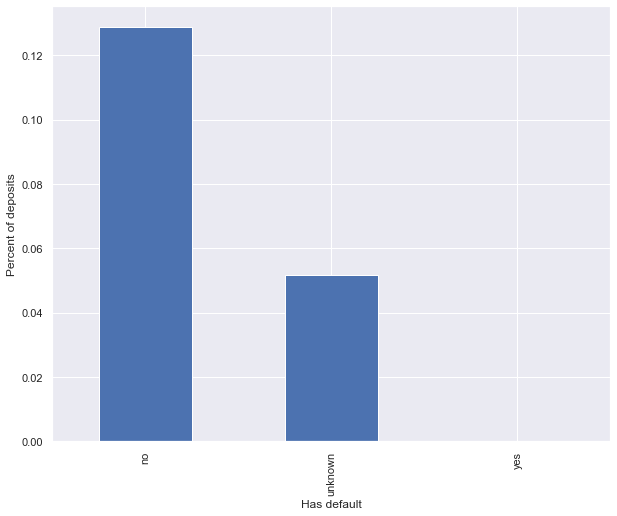

In [10]:
from scipy.stats import pearsonr

df.loc[df['y'] == 'no', 'y_dummy'] = 0
df.loc[df['y'] == 'yes', 'y_dummy'] = 1
df.loc[df['default'] == 'no', 'default_dummy'] = -1
df.loc[df['default'] == 'yes', 'default_dummy'] = 1
df.loc[df['default'] == 'unknown', 'default_dummy'] = 0
r = pearsonr(df['default_dummy'], df['y_dummy'])


print('Pearson correlation:', r[0], 'p-value:', r[1])

df.groupby('default')['y_dummy'].mean().plot(kind='bar') 
plt.ylabel('Percent of deposits')
plt.xlabel('Has default')
plt.show();

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
[ 4 11  6  9  2  0 15]
Pearson correlation: -0.16127577448117522 
p-value: 4.9036585784254894e-238


Text(0, 0.5, 'Age')

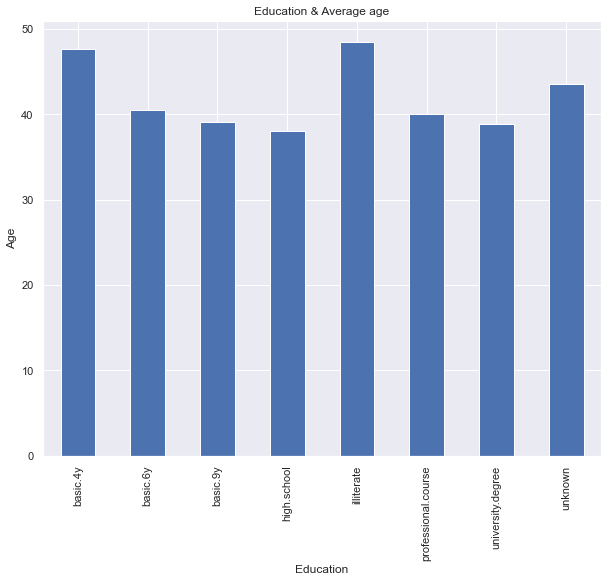

In [11]:
print(df['education'].unique())
new_values = {'basic.4y': 4,'basic.6y': 6,'basic.9y': 9,'high.school' : 11,'professional.course' : 2,'university.degree': 15,'unknown' : 0,'illiterate' : 0 }
df['dummy_education'] = df['education'].map(new_values)
print(df['dummy_education'].unique())
pr = pearsonr(df['dummy_education'], df['age']) 
print('Pearson correlation:', pr[0], 
      '\np-value:', pr[1])
df.groupby('education')['age'].mean().plot(kind='bar')
plt.title('Education & Average age')
plt.xlabel('Education')
plt.ylabel('Age')

In [12]:
pr = pearsonr(df['duration'], df['age']) 
print('Pearson correlation:', pr[0], 
      '\np-value:', pr[1])

Pearson correlation: -0.0008657050101409484 
p-value: 0.8605390363787685
